Silahkan upload file .npy hasil ekstraksi sebelumnya (misal: enol_gas.npy)


Saving keto_sol.npy to keto_sol.npy

Berhasil memuat keto_sol.npy dengan bentuk data: (990, 2209)
Menjalankan t-SNE (ini mungkin memakan waktu beberapa menit)...
Proses t-SNE selesai!


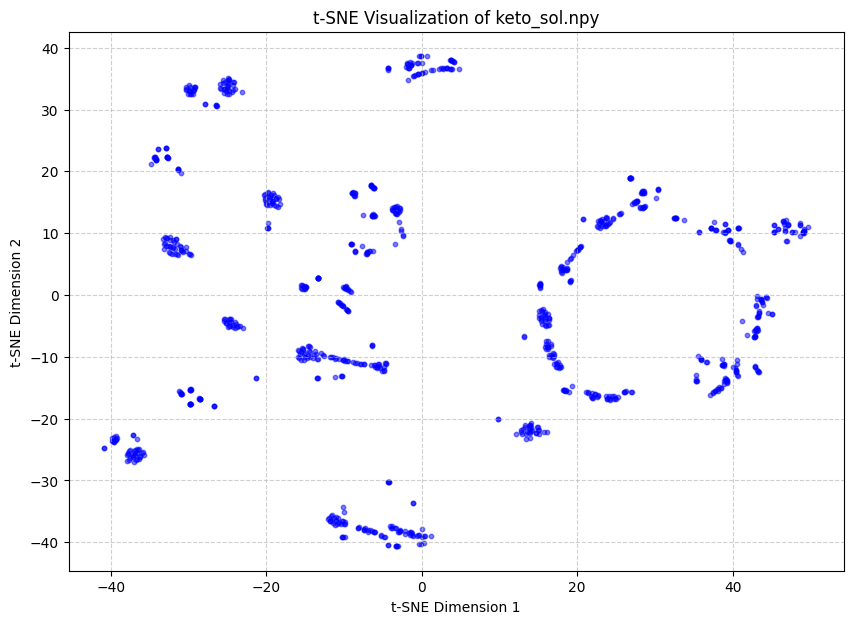

Koordinat 2D disimpan sebagai: keto_sol_2d.npy


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from google.colab import files

# --- 1. UPLOAD FILE .NPY ---
print("Silahkan upload file .npy hasil ekstraksi sebelumnya (misal: enol_gas.npy)")
uploaded = files.upload()

for nama_file in uploaded.keys():
    # --- 2. LOAD DATA ---
    X = np.load(nama_file)
    print(f"\nBerhasil memuat {nama_file} dengan bentuk data: {X.shape}")

    # --- 3. PROSES t-SNE (Sesuai Parameter Paper) ---
    print("Menjalankan t-SNE (ini mungkin memakan waktu beberapa menit)...")

    # Perplexity=30 dan Learning Rate=200 sesuai rujukan paper
    tsne = TSNE(
        n_components=2,
        perplexity=30,
        learning_rate=200,
        init='pca',
        random_state=42
    )

    X_embedded = tsne.fit_transform(X)

    print("Proses t-SNE selesai!")

    # --- 4. VISUALISASI GRAFIK ---
    plt.figure(figsize=(10, 7))
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c='blue', alpha=0.5, s=10)

    plt.title(f't-SNE Visualization of {nama_file}')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.grid(True, linestyle='--', alpha=0.6)

    # Simpan gambar plot
    nama_plot = nama_file.replace(".npy", "_tsne_plot.png")
    plt.savefig(nama_plot, dpi=300)
    plt.show()

    # --- 5. SIMPAN DATA t-SNE ---
    # Data koordinat 2D ini akan sangat penting untuk tahap CLUSTERING nanti
    nama_data_2d = nama_file.replace(".npy", "_2d.npy")
    np.save(nama_data_2d, X_embedded)

    print(f"Koordinat 2D disimpan sebagai: {nama_data_2d}")
    files.download(nama_data_2d)